In [1]:
#importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import statsmodels.api as sm

In [2]:
data = pd.read_csv('data.csv')
data.head()  #check if the data is loaded

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.isnull().sum() #checking for null values

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [4]:
#renaming the columns
data.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol',
              'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio',
              'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'Thinness_1_19_Years',
              'Thinness_5_9_Years', 'Income_Composition_Of_Resources', 'Schooling']

In [5]:
#printing the number of outliers and NaN values.
for (columnName, columnData) in data.iloc[:,3:].iteritems():
   avg = columnData.mean()
   std_dev = columnData.std()
   print('Column Name : ', columnName)
   print('Number of NUll values : ', columnData.isnull().sum())
   print('Number of Outliers : ',((columnData < (avg - 2 * std_dev)) |(columnData > (avg + 2 * std_dev))).sum())



Column Name :  Life_Expectancy
Number of NUll values :  10
Number of Outliers :  138
Column Name :  Adult_Mortality
Number of NUll values :  10
Number of Outliers :  137
Column Name :  Infant_Deaths
Number of NUll values :  0
Number of Outliers :  56
Column Name :  Alcohol
Number of NUll values :  194
Number of Outliers :  68
Column Name :  Percentage_Expenditure
Number of NUll values :  0
Number of Outliers :  141
Column Name :  Hepatitis_B
Number of NUll values :  553
Number of Outliers :  197
Column Name :  Measles
Number of NUll values :  0
Number of Outliers :  67
Column Name :  BMI
Number of NUll values :  34
Number of Outliers :  5
Column Name :  Under_Five_Deaths
Number of NUll values :  0
Number of Outliers :  57
Column Name :  Polio
Number of NUll values :  19
Number of Outliers :  188
Column Name :  Total_Expenditure
Number of NUll values :  226
Number of Outliers :  108
Column Name :  Diphtheria
Number of NUll values :  19
Number of Outliers :  205
Column Name :  HIV/AIDS
N

In [6]:
#checking for outliers for columns containing numerical values
#returns a matrix containing only True or False values
avg = data.iloc[:,3:].mean()
std_dev = data.iloc[:,3:].std()
outlier_df = ((data.iloc[:,3:] < (avg - 2 * std_dev)) |(data.iloc[:,3:] > (avg + 2 * std_dev)))

In [7]:
#merging the first three columns with the matrix
result_df = pd.concat([data.iloc[:,0:3], outlier_df], axis=1)
#appending the number of outliers in a row into a list
value_series = []
for index,row in outlier_df.iterrows():
   value_series.append(row.sum())

In [8]:
#retaining the rows which contain 0 outliers
result_df['value'] = value_series
result_df2= result_df.loc[result_df['value'] == 0]
result_df2.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_Of_Resources,Schooling,value
16,Albania,2015,Developing,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
17,Albania,2014,Developing,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
18,Albania,2013,Developing,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
19,Albania,2012,Developing,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
20,Albania,2011,Developing,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [9]:
result_df2.shape


(1761, 23)

In [10]:
#replacing the all-False matrix by it's original values.
result_df3 = result_df.loc[result_df['value'] != 0]
arr = []
for i,r in result_df3.iterrows():
   arr.append(i)
result_df4 = data.drop(data.index[arr])
result_df4.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_Of_Resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [11]:
total_missing_values = result_df4.isnull().sum()
missing_values_per = result_df4.isnull().sum()/result_df4.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)

In [12]:
def null_cell(data):
   total_missing_values = result_df4.isnull().sum()
   missing_values_per = result_df4.isnull().sum()/result_df4.isnull().count()
   null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
   null_values = null_values.sort_values('total_null', ascending=False)
   return null_values[null_values['total_null'] > 0]


In [13]:
regions = pd.read_csv('all.csv')
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

In [14]:
Data_merged = pd.merge(result_df4, regions[['name', 'region', 'sub-region']], left_on='Country', right_on='name')
null_cell(Data_merged)

,total_null,total_null_perc
Population,414,0.235094
GDP,271,0.153890
Hepatitis_B,236,0.134015
Total_Expenditure,161,0.091425
Alcohol,139,0.078932
Income_Composition_Of_Resources,84,0.047700
Schooling,83,0.047132
Thinness_5_9_Years,14,0.007950
Thinness_1_19_Years,14,0.007950
BMI,14,0.007950


In [15]:
fill_list = (null_cell(Data_merged)).index

In [16]:
df_interpolate = Data_merged.copy()

for col in fill_list:
   df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

In [17]:
null_cell(df_interpolate)


,total_null,total_null_perc
Population,414,0.235094
GDP,271,0.153890
Hepatitis_B,236,0.134015
Total_Expenditure,161,0.091425
Alcohol,139,0.078932
Income_Composition_Of_Resources,84,0.047700
Schooling,83,0.047132
Thinness_5_9_Years,14,0.007950
Thinness_1_19_Years,14,0.007950
BMI,14,0.007950


In [18]:
df_interpolate[df_interpolate['Adult_Mortality'].isna()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_Of_Resources,Schooling,name,region,sub-region
342,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,0.1,722.75665,NaN,2.7,2.6,0.721,12.7,Dominica,Americas,Latin America and the Caribbean
861,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,Europe,Western Europe
950,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0.1,NaN,NaN,0.1,0.1,NaN,NaN,Niue,Oceania,Polynesia


In [19]:
for col in fill_list:
   df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

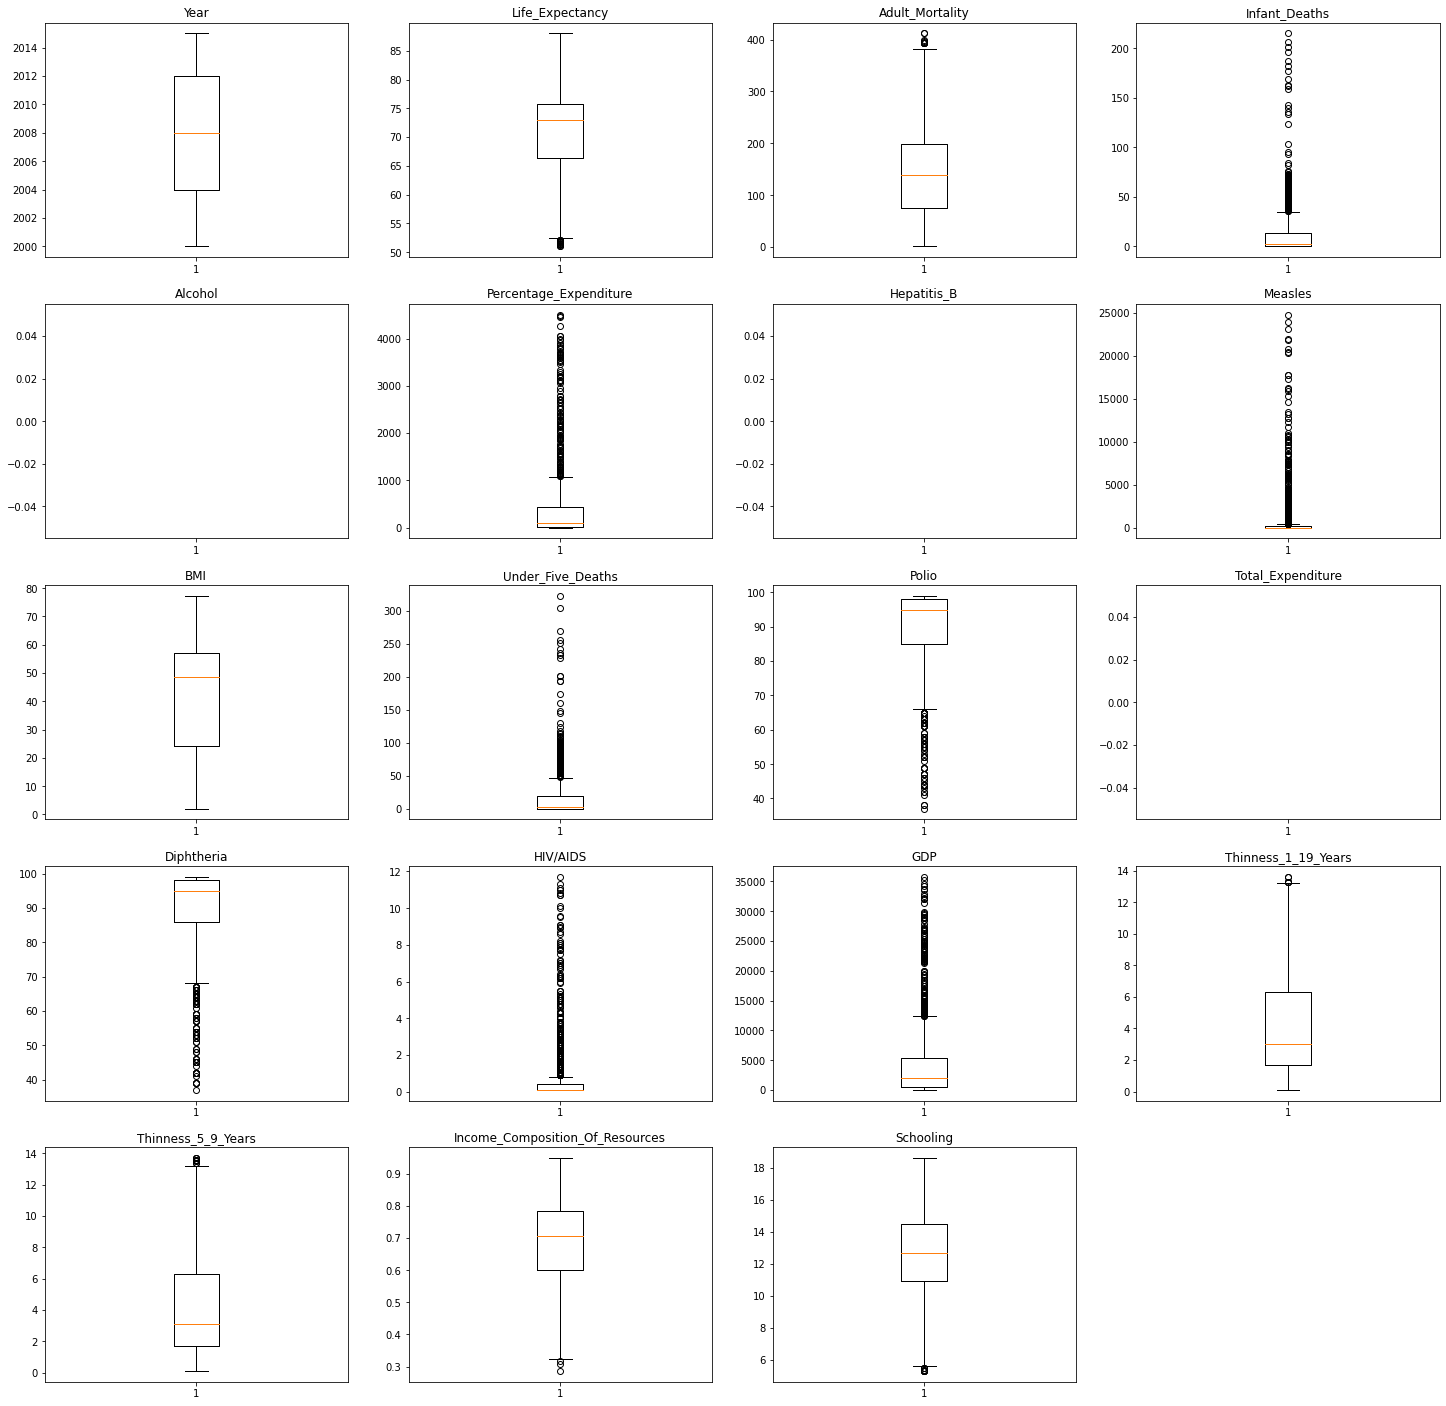

In [20]:
outliers_by_nineteen_variables = ['Year', 'Life_Expectancy','Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure',
                                   'Hepatitis_B','Measles', 'BMI',
                                   'Under_Five_Deaths', 'Polio', 'Total_Expenditure','Diphtheria', 'HIV/AIDS', 'GDP',
                                   'Thinness_1_19_Years', 'Thinness_5_9_Years', 'Income_Composition_Of_Resources', 'Schooling']
plt.figure(figsize=(25,25))

for i in range(0,19):
   plt.subplot(5, 4, i+1)
   plt.boxplot(df_interpolate[outliers_by_nineteen_variables[i]])
   plt.title(outliers_by_nineteen_variables[i])



Text(0.5, 1.0, 'Life Expectancy Values in Years by Regions')

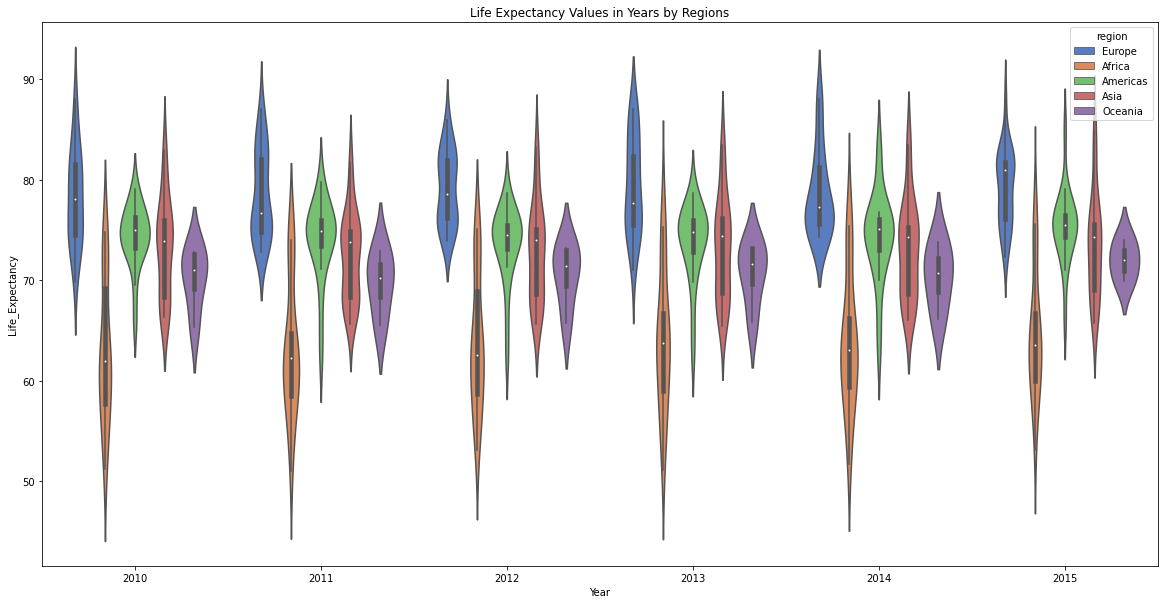

In [21]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df_interpolate.loc[df_interpolate['Year']>2009]["Year"],
              y=df_interpolate["Life_Expectancy"],
              hue=df_interpolate["region"],
              data=df_interpolate.loc[df_interpolate['Year']>2010],
              palette="muted")

plt.title('Life Expectancy Values in Years by Regions')



In [22]:
del df_interpolate['name']
del df_interpolate['region']
del df_interpolate['sub-region']
df_interpolate.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1_19_Years',
       'Thinness_5_9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

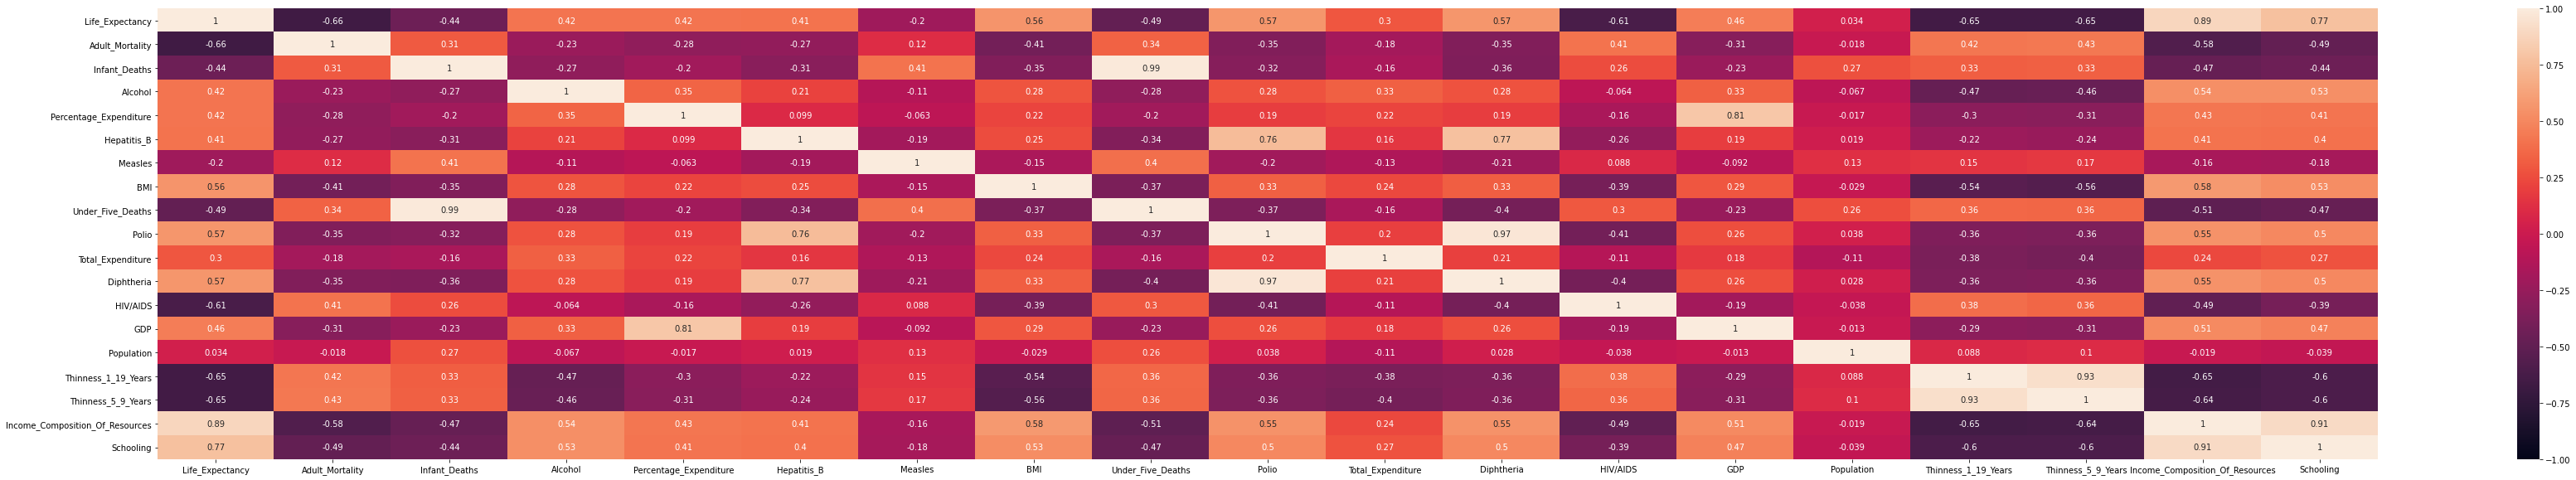

In [23]:
#plotting a co-relation heat-map
corr_heatmap = df_interpolate.iloc[:,3:]
plt.figure(figsize=(60, 10))
heatmap = sns.heatmap(corr_heatmap.corr(), vmin=-1, vmax=1, annot=True)



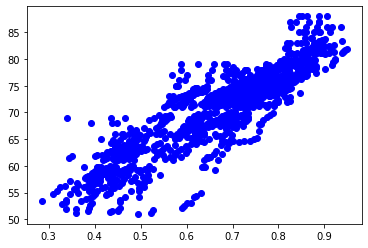

In [24]:
plt.scatter( corr_heatmap['Income_Composition_Of_Resources'],corr_heatmap['Life_Expectancy'], color ='blue')

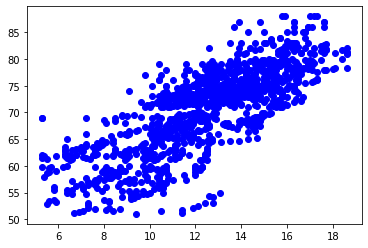

In [25]:
plt.scatter( corr_heatmap['Schooling'],corr_heatmap['Life_Expectancy'], color ='blue')


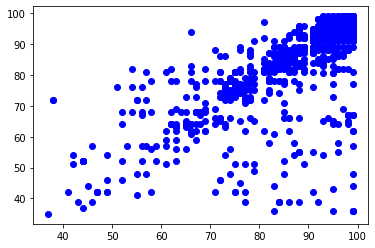

In [26]:
plt.scatter( corr_heatmap['Polio'],corr_heatmap['Hepatitis_B'], color ='blue')


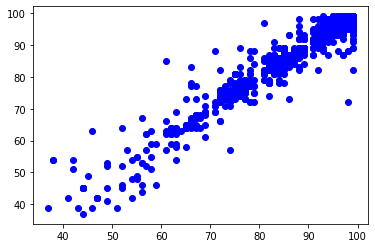

In [27]:
plt.scatter( corr_heatmap['Polio'],corr_heatmap['Diphtheria'], color ='blue')


In [28]:
#rho testing for Polio.
#since it is very close to 0, we can conclude that the it's closely
#related to the population
r_Polio = 0.57
n = df_interpolate.shape[0]
t = (r_Polio*math.sqrt(n-2))/(math.sqrt(1-(r_Polio**2)))
scipy.stats.t.sf(np.abs(t), df_interpolate.shape[0]-1)
r_Polio = scipy.stats.t.sf(t, 1760)
print(r_Polio)

4.8400466552145045e-126


In [29]:
r_Schooling = 0.77
n = df_interpolate.shape[0]
t = (r_Schooling*math.sqrt(n-2))/(math.sqrt(1-(r_Schooling**2)))
scipy.stats.t.sf(np.abs(t), df_interpolate.shape[0]-1)
r_Schooling = scipy.stats.t.sf(t, 1760)
print(r_Schooling)

4.427427155008873e-296


In [30]:
r_Income_Composition_Of_Resources = 0.77
n = df_interpolate.shape[0]
t = (r_Income_Composition_Of_Resources*math.sqrt(n-2))/(math.sqrt(1-(r_Income_Composition_Of_Resources**2)))
scipy.stats.t.sf(np.abs(t), df_interpolate.shape[0]-1)
r_Income_Composition_Of_Resources = scipy.stats.t.sf(t, 1760)
print(r_Income_Composition_Of_Resources)

4.427427155008873e-296


In [31]:
#initialising the x and y axes
x = df_interpolate[['Schooling', 'Income_Composition_Of_Resources','Polio']]
y = df_interpolate['Life_Expectancy']


In [32]:
#executing the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:45:00   Log-Likelihood:                -3647.6
No. Observations:                1398   AIC:                             7303.
Df Residuals:                    1394   BIC:                             7324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     